In [369]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [371]:
df=pd.read_csv('Dataset_A_loan.csv')

In [373]:
# menampilkan 5 data teratas
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [375]:
# melihat dimensi data 
df.shape

(45000, 14)

In [377]:
# identifikasi kolom yang ada di dataset 
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

missing value di kolom : person_income
  

In [382]:
# ringkasan statistik untuk kolom numerik 
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [384]:
# ringkasan statistik untuk kolom yang bertipe object
df.describe(include = "object")

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,4,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24799,13399,23443,9153,22858


In [386]:
# menghitung persentase missing value di kolom person_income untuk menentukan cara handling missing valuenya 
missing_percentage = (df['person_income'].isnull().sum() / len(df)) * 100
print(missing_percentage)

5.0


5% dari data di kolom person_income adalah missing (kosong / NaN).

# Loan Approval Prediction

Notebook ini membandingkan dua model machine learning: **Random Forest** dan **XGBoost** untuk memprediksi status pinjaman berdasarkan berbagai fitur.


In [390]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [392]:
df['person_gender'].value_counts()

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

nama data pada kolom person_gender tidak konsisten

In [395]:
# Perbaikan data inkonsisten di 'person_gender' untuk data training
df['person_gender'] = df['person_gender'].str.lower()
df['person_gender'] = df['person_gender'].replace('fe male', 'female')

# Cek distribusi gender setelah pembersihan
print(df['person_gender'].value_counts())

person_gender
male      24844
female    20156
Name: count, dtype: int64


In [397]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [399]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [401]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [403]:
df['previous_loan_defaults_on_file'].value_counts()  

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

# Split Data

In [406]:
input_df=df.drop('loan_status',axis=1)
output_df=df['loan_status']

In [408]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [410]:
# handling missing value di kolom person_income 
imputer = SimpleImputer(strategy='median')
x_train['person_income'] = imputer.fit_transform(x_train[['person_income']])
x_test['person_income'] = imputer.transform(x_test[['person_income']])

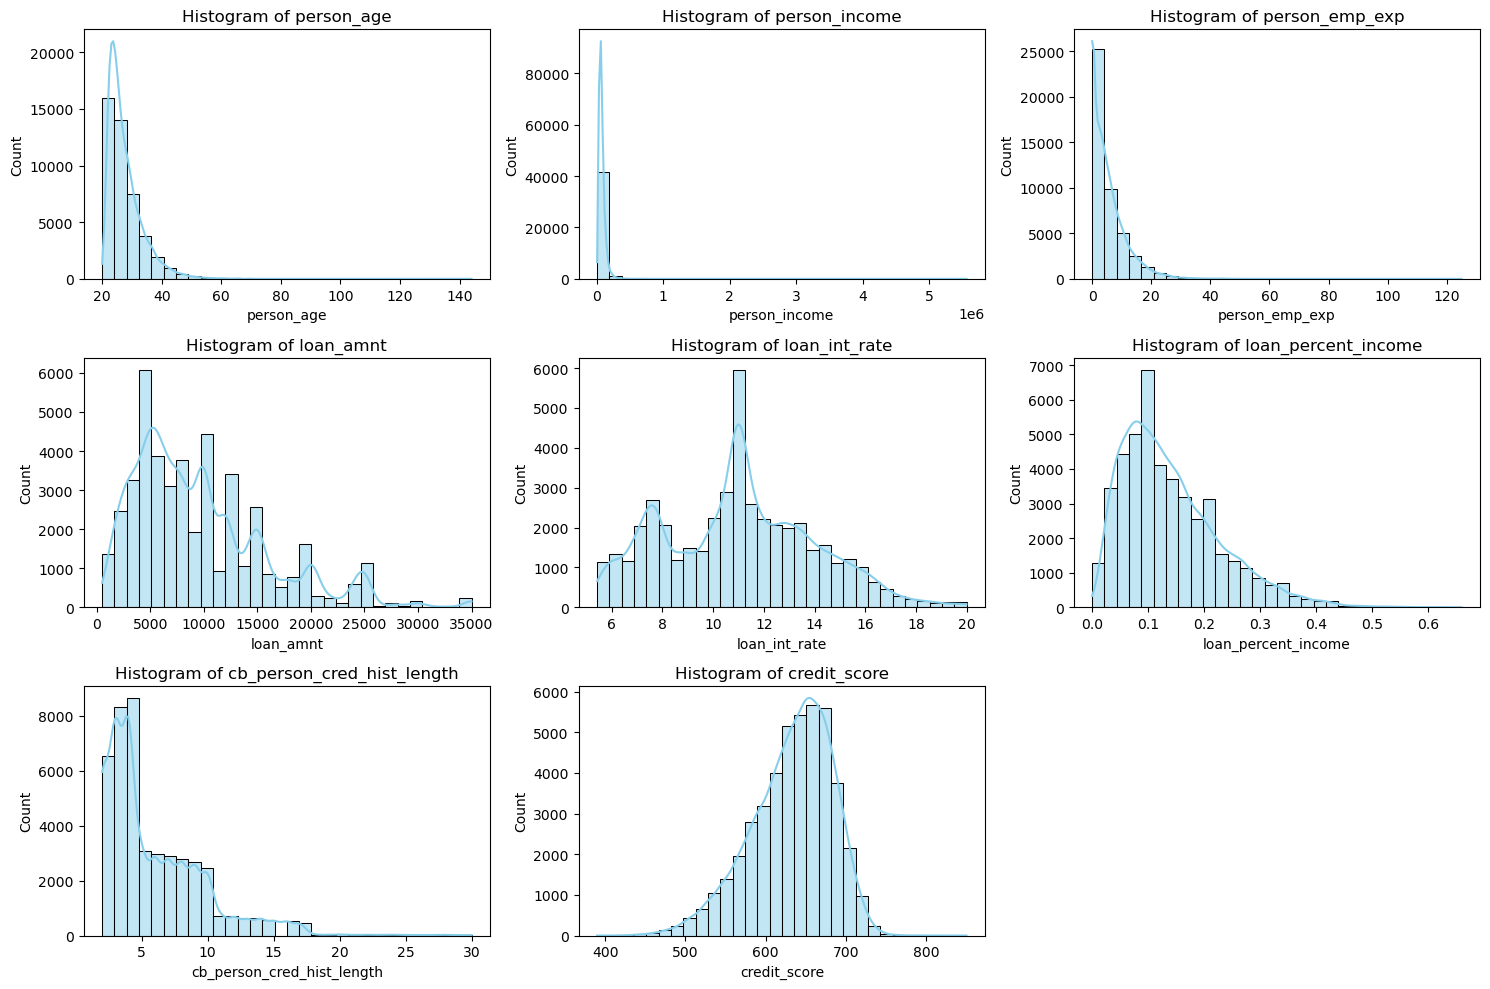

In [412]:
import seaborn as sns
import matplotlib.pyplot as plt

# historgram untuk melihat distribusi data numerik (skewness, outlier, bentuk distribusi)
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                     'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


- Distribusi data kolom ( person_age, person_income, person_emp_exp, loan_amnt,  loan_percent_income, cb_person_cred_hist_length) miring ke kanan (right-skewed) dan terdapat outlier dengan nilai yang extreme. 
- Distribusi loan_int_rate dan credit_score mendekati normal 

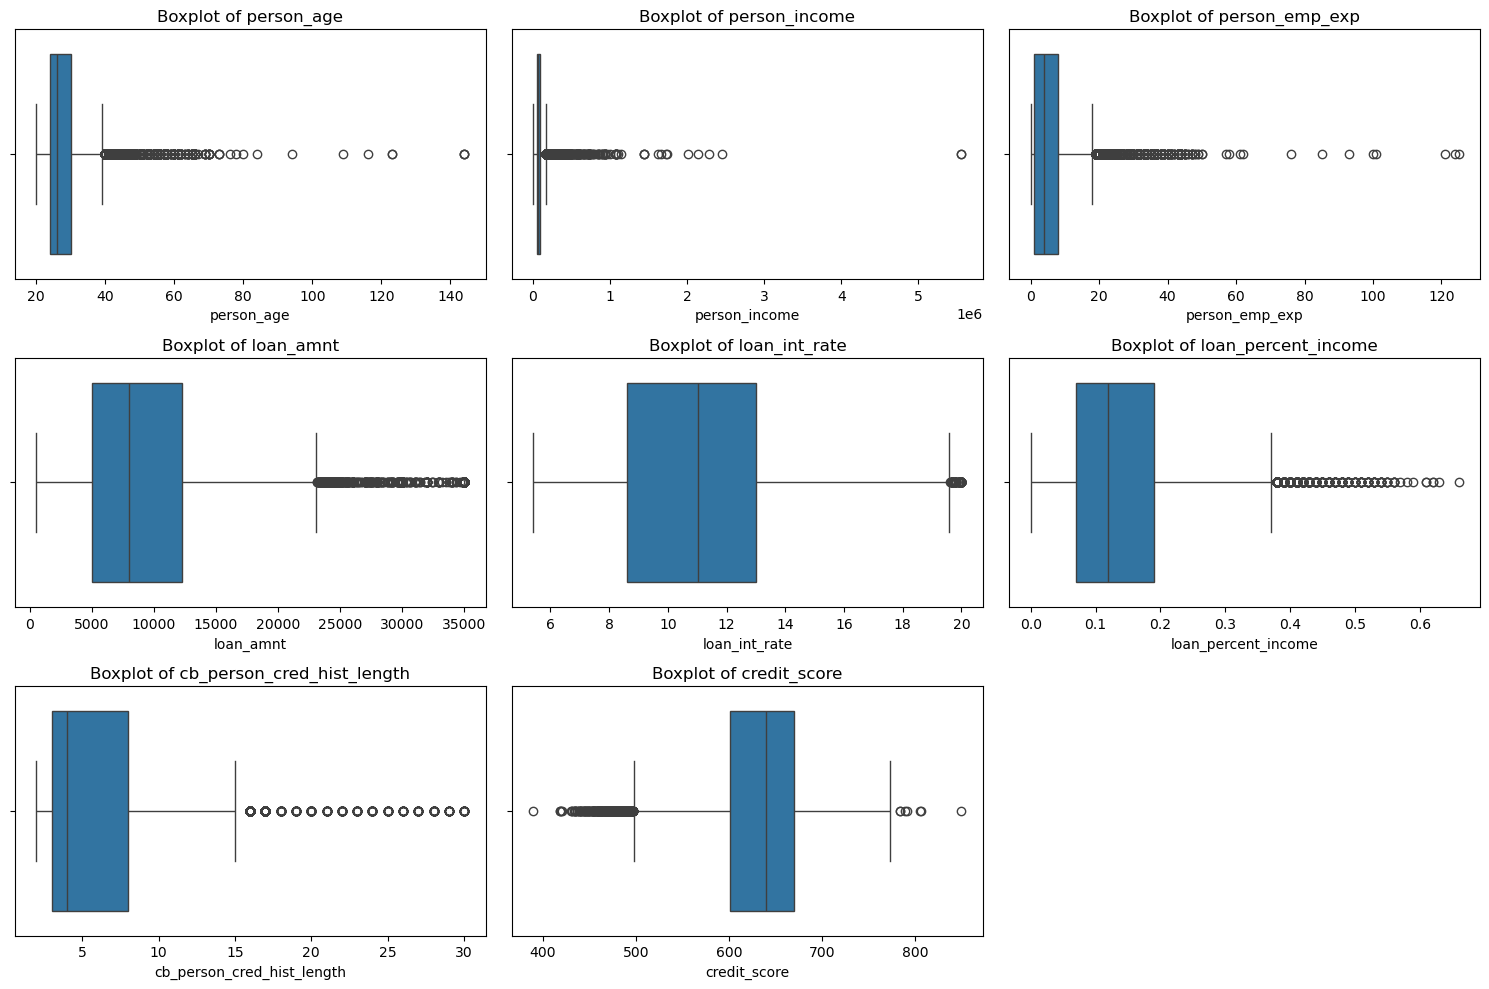

In [414]:
# boxplot untuk deteksi outlier dan penyebaran data 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [415]:
# Pisahkan kolom numerik aja
from sklearn.preprocessing import RobustScaler
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# Scaling
scaler = RobustScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


In [416]:
#encode
# Label Encoding untuk data kategori dengan 2 kelas
from sklearn.preprocessing import LabelEncoder
label_cols = ['person_gender', 'previous_loan_defaults_on_file']
label_encoder = LabelEncoder()

for col in label_cols:
    x_train[col] = label_encoder.fit_transform(x_train[col])
    x_test[col] = label_encoder.transform(x_test[col])

# One-Hot Encoding untuk kolom dengan lebih dari 2 kategori
one_hot_cols = ['person_education', 'loan_intent', 'person_home_ownership']
x_train = pd.get_dummies(x_train, columns=one_hot_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=one_hot_cols, drop_first=True)



In [417]:
x_train.columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

In [418]:
x_test.columns

Index(['person_age', 'person_gender', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'person_education_Bachelor',
       'person_education_Doctorate', 'person_education_High School',
       'person_education_Master', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

In [419]:
print(x_train.shape)  # Menampilkan dimensi x_train
print(y_train.shape)  # Menampilkan dimensi y_train


(36000, 22)
(36000,)


# Model Random Forest 

In [421]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')


RF_class = RandomForestClassifier(criterion='gini',
                                   max_depth=4,
                                   class_weight='balanced',  # karena kelas inbalance 
                                   random_state=42)
RF_class.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [422]:
y_predict=RF_class.predict(x_test)

In [423]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      6990
           1       0.60      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.81      9000
weighted avg       0.89      0.85      0.86      9000



Precisision
- kelas 0 : 0.88 -> artinya 88% dari prediksi kelas 0 benar
- kelas 1 : 0.94 -> artinya 94% dari prediksi kelas 1 benar

Recall 
- model menangkan 99% dari data kelas 0 yang sebenarnya dan hanya menangkan 55% dari data kelas 1 yang sebenarnya
- model sering gagal mendeteksi kelas 1

F1 score menunjukan model gagal mendeteksi sebagian besar kasus kelas 1 

Kesimpulan : 
Model memiliki presisi yang baik untuk kedua kelas, tetapi sangat berat ke kelas 0, dengan recall yang sangat tinggi di kelas 0 (0.99). Ini berarti model sangat baik dalam mendeteksi kelas 0, tetapi kurang dalam mendeteksi kelas 1 (dengan recall hanya 0.55).



# Tuning Random Forest

In [426]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], 
}

In [427]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='f1',        # metric for scoring
                            cv=5)  

In [428]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("F1 score :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
F1 score : 0.7961333616946861


In [429]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion='log_loss',
                                   max_depth=8,
                                   class_weight='balanced', 
                                   random_state=42)

In [431]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=8, random_state=42)

In [432]:
y_predict_best=RF_class_best.predict(x_test)

In [433]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      6990
           1       0.67      0.90      0.77      2010

    accuracy                           0.88      9000
   macro avg       0.82      0.89      0.84      9000
weighted avg       0.90      0.88      0.89      9000



- Terdapat peningkatan pada accuracy sebesar 3% yang artinya model semakin banyak memprediksi dengan benar 
- peningkatan dalam mengenali kelas 0, ada peningkatan direcall
- precision dan f1 score kelas 1 meningkat, prediksi loan yang disetujui lebih akurat (false positive berkurang -> menyetujui loan yang seharusnya ditolak) 
- model setelah dituning lebih seimbang dalam mengenali kelas 0 dan kelas 1 

# Model XGBoost 

In [436]:
# untuk menangani kelas inbalance dengan memberikan bobot lebih besar/ kelas positif 1 pada kelas minoritas 
# agar model tidak bias ke kelas mayoritas 
#scale_pos_weight = len(y_train) / (2.0 * sum(y_train == 1))
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [437]:
# Model XGBoost dengan parameter dasar
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Untuk mengatasi ketidakseimbangan kelas
    use_label_encoder=False,  
    eval_metric='logloss',  
    random_state=42
)
xgb_model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [438]:
y_predict_best2 = xgb_model.predict(x_test)

In [445]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best2, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      6990
           1       0.76      0.90      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.87      0.91      0.88      9000
weighted avg       0.92      0.92      0.92      9000



Accuracy : model berhasil memprediksi 93% dari seluruh data dengan benar 

Kelas 0 : precision & recall tinggi -> model sangat baik mendeteksi kelas ini, hampir semua data kelas 0 bisa dikenali dan jarang salah diklasifikasi 

Kelas 1 : model cukup baik dalam mengenali kelas ini, tapi masih ada yang salah diklasifikasi sebagai tidak disetujui (false negative) 


# Tuning XGBoost 

In [448]:
parameters = {
    'n_estimators': [100, 200], #banyak pohon
    'max_depth': [3, 5, 7,9],
    'learning_rate': [0.01, 0.05, 0.1,0.2],
    'subsample':[0.6,0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

In [449]:
# GridSearchCV untuk XGBoost
xgb_grid = GridSearchCV(xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False),
                        param_grid=parameters,
                        scoring='f1',
                        cv=5)

In [450]:
xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1')

In [451]:
print(f"Best parameters: {xgb_grid.best_params_}")

Best parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}


In [452]:
xgb_best_model = xgb.XGBClassifier(
    learning_rate=0.1,  
    max_depth=9,       
    n_estimators=200,   
    subsample= 0.8,      
    gamma = 0.2,
    scale_pos_weight=scale_pos_weight,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [453]:
xgb_best_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [454]:
y_predict_best3 = xgb_best_model.predict(x_test)

In [458]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best3, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6990
           1       0.82      0.87      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.89      0.90      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [461]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluasi sebelum tuning
print("Sebelum Tuning:")
print(classification_report(y_test, y_predict_best2, target_names=['0', '1']))

# Evaluasi setelah tuning
print("\nSetelah Tuning:")
print(classification_report(y_test, y_predict_best3, target_names=['0', '1']))

# Confusion Matrix
print("\nConfusion Matrix (Setelah Tuning):")
print(confusion_matrix(y_test, y_predict_best3))

Sebelum Tuning:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      6990
           1       0.76      0.90      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.87      0.91      0.88      9000
weighted avg       0.92      0.92      0.92      9000


Setelah Tuning:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6990
           1       0.82      0.87      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.89      0.90      0.90      9000
weighted avg       0.93      0.93      0.93      9000


Confusion Matrix (Setelah Tuning):
[[6597  393]
 [ 270 1740]]


- Model berhasil memprediksi 93% dari seluruh data dengan benar, model akurat dalam memprediksi kedua kelas
- Terdapat peningkatan pada precision dan F1-score kelas 1, yang berarti model menjadi lebih akurat dalam mengenali loan yang disetujui dan mengurangi kesalahan prediksi yang salah (false positive) meskipun recall menurun sedikit 
- Model tetap akurat dalam mengenali kelas 0 

# Kesimpulan 
XGBoost lebih baik dibanding Random Forest karena memiliki akurasi lebih tinggi. XGBoost juga lebih akurat dalam memprediksi loan yang disetujui (precision 0.83 vs 0.67) dan lebih baik dalam mendeteksi loan yang tidak disetujui (recall 0.95 vs 0.87). Meskipun Random Forest memiliki recall lebih tinggi untuk kelas 1 (0.90 vs 0.85), XGBoost secara keseluruhan lebih seimbang dan memiliki F1-score yang lebih tinggi, terutama untuk kelas 1.